# STAT 510 Quiz 3
## Juan Carlos Apitz

In [1]:
# import libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Question 1

## Part a.

### Hald Data

#### For this data we begin by conducting a model selection analysis based on the $R^2$, adjusted $R^2$, the AIC, and Mallow's $C_p$. 

#### To construct all possible regression models, I wrote a script in python that produces the necesary results:

These are the first few rows of the Hald dataset:

       Y  X1  X2  X3  X4       mean
0   78.5   7  26   6  60  95.423077
1   74.3   1  29  15  52  95.423077
2  104.3  11  56   8  20  95.423077
3   87.6  11  31   8  47  95.423077
4   95.9   7  52   6  33  95.423077

The possible models are:

Y ~ X1 + X2 + X3 + X4
Y ~ X2 + X3 + X4
Y ~ X1 + X3 + X4
Y ~ X3 + X4
Y ~ X1 + X2 + X4
Y ~ X2 + X4
Y ~ X1 + X4
Y ~ X4
Y ~ X1 + X2 + X3
Y ~ X2 + X3
Y ~ X1 + X3
Y ~ X3
Y ~ X1 + X2
Y ~ X2
Y ~ X1
Y ~ mean

The following plots summarize our analysis:



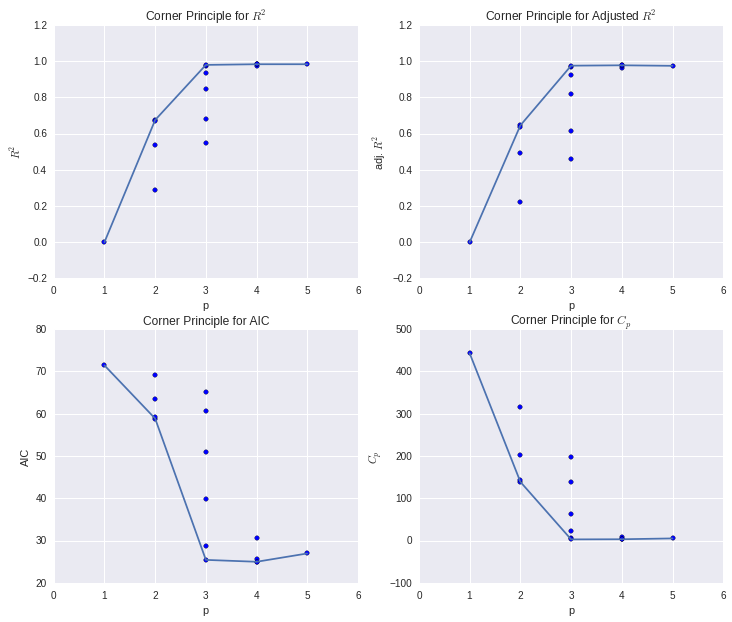

In [2]:
run construct_models

In [3]:
results_tbl

,model,P,R-sq,Adj. R-sq,AIC,Cp
0,model00,5,0.9824,0.9736,24.9443,3.0000
1,model01,4,0.9728,0.9638,28.5759,5.3375
2,model02,4,0.9813,0.9750,23.7276,1.4968
3,model03,3,0.9353,0.9223,37.8526,20.3731
4,model04,4,0.9823,0.9764,22.9739,1.0182
5,model05,3,0.6801,0.6161,58.6293,136.2259
6,model06,3,0.9725,0.9670,26.7417,3.4959
7,model07,2,0.6745,0.6450,56.8516,136.7308
8,model08,4,0.9823,0.9764,23.0112,1.0413
9,model09,3,0.8470,0.8164,49.0371,60.4377


In [4]:
print 'The models to be considered are model 06: {} and model 12: {}.'.format(models[6], models[12])

The models to be considered are model 06: Y ~ X1 + X4 and model 12: Y ~ X1 + X2.


#### The above analysis indicates that a model with p = 3 might be adequate. The corner principle plots indicate that , models with P > 3, do not produce improvements in $R^2$, adjusted $R^2$, the AIC, or Mallow's $C_p$. In particular, model 06: $Y = \beta_0 + \beta_1X_1 + \beta_2X_4 + \epsilon$ and model 12: $Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon$, shows high $R^2$, low AIC and $C_p$ that is small and relatively close to p=3. The other models with p=3, show large values of $C_p$ which is an indication of bias, thus they will not be considered.

## Part b.

#### Now we implement Forward, Backward, and Stepwise selection and compare with the results in a. above. For this I wrote the module mselector. The python code is included as an appendix.

#### Import mselector and create new dataset.

In [5]:
import mselector as s

dfnew = df.iloc[:,:5]

### Forward Selection

#### Run the froward selection algorithm:

In [6]:
s.foresel(dfnew,'Y')

The optimal model is Y ~ X4 + X1


/home/jcapitz/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     176.6
Date:                Tue, 01 Dec 2015   Prob (F-statistic):           1.58e-08
Time:                        13:30:42   Log-Likelihood:                -29.817
No. Observations:                  13   AIC:                             65.63
Df Residuals:                      10   BIC:                             67.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    103.0974      2.124     48.540      0.000        98.365   107.830
X4            -0.6140      0.049    -12.621      0.000        -0.722    -0.506
X1             1.4400      0.138     10.403      0.000         1.132     1.748
==============================================================================
Omnibus:                        0.408   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.432
Skew:                          -0.331   Prob(JB):                        0.806
Kurtosis:                       2.400   Cond. No.                         97.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Backward Selection

#### Run the backward selection algorithm:

In [7]:
s.backsel(dfnew, 'Y')

The optimal model is Y ~ X2 + X1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     229.5
Date:                Tue, 01 Dec 2015   Prob (F-statistic):           4.41e-09
Time:                        13:30:42   Log-Likelihood:                -28.156
No. Observations:                  13   AIC:                             62.31
Df Residuals:                      10   BIC:                             64.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     52.5773      2.286     22.998      0.000        47.483    57.671
X2             0.6623      0.046     14.442      0.000         0.560     0.764
X1             1.4683      0.121     12.105      0.000         1.198     1.739
==============================================================================
Omnibus:                        1.509   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.104
Skew:                           0.503   Prob(JB):                        0.576
Kurtosis:                       1.987   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Stepwise Selection

#### Run the stepwise selection algorithm:

In [8]:
s.stepwsel(dfnew, 'Y')

The optimal model is Y ~ X1 + X2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     229.5
Date:                Tue, 01 Dec 2015   Prob (F-statistic):           4.41e-09
Time:                        13:30:42   Log-Likelihood:                -28.156
No. Observations:                  13   AIC:                             62.31
Df Residuals:                      10   BIC:                             64.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     52.5773      2.286     22.998      0.000        47.483    57.671
X1             1.4683      0.121     12.105      0.000         1.198     1.739
X2             0.6623      0.046     14.442      0.000         0.560     0.764
==============================================================================
Omnibus:                        1.509   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.104
Skew:                           0.503   Prob(JB):                        0.576
Kurtosis:                       1.987   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

Based on the results of the analysis in part a. and b. above the model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$ seems most appropriate. In part a. this particular model shows high values of $R^2$ and adjusted-$R^2$ as well as low values of AIC and $C_p$ statistics. In addition, both the backward selection and stepwise selection algorithms selected this particular model. In a sense, this result is satisfactory because the backward selection and the stepwise selection algorithm take into account interactions between the explanatory variables, which is the reason the stepwise algorithm "dropped" $X_4$ in favor of $X_2$ in the selection process. The reason this variable gets dropped is because of the correlation between $X_2$ and $X_4$, which we can see in the graph below:

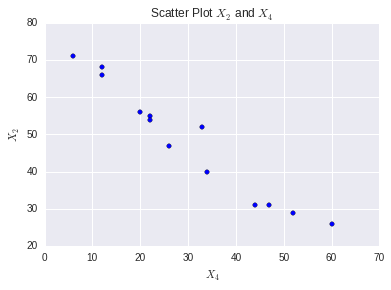

In [9]:
plt.scatter(x=df['X4'], y=df['X2'])
plt.title('Scatter Plot $X_2$ and $X_4$')
plt.ylabel('$X_2$')
plt.xlabel('$X_4$')
plt.show()

## Question 2

#### The DFFITS statistic is composed of two factors: $$e_i \left[ \frac{n-p-1}{SSE\left(1-h_{ii}\right)-e_i^2} \right]^{1/2}$$ and $$\left(\frac{h_{ii}}{1-h_{ii}}\right)^{1/2}$$ 

#### The first factor, known as the Studentized Deleted Residual, is effective in capturing extreme Y observations. If and observation $y_i$ is an outlier, this factor will be large in absolute value. Notice that the residual $e_i$, will also tend to be large.

#### The second factor is a function of the leverage $h_{ii}$, with the property that $0<h_{ii}<1$. An observation $x_i$, if it is an outlier, will have high leverage and this second factor will be greater than 1. Therefore, this second factor will be effective in capturing outlying X observations.

## APPENDIX: Code

### construct_models.py Script

In [ ]:
#!/usr/bin/python

# import libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt

# hald data
filename = '~/Documents/LinearRegression/STAT510/quiz3/hald.txt'
df = pd.read_table(filename, delim_whitespace=True)
df['mean'] = np.mean(df['Y'])
print 'These are the first few rows of the Hald dataset:'
print ''
print df.head()

# powerset
def powerset(seq):
    """
    Returns all the subsets of this set. This is a generator.
    """
    if len(seq) <= 1:
        yield seq
        yield []
    else:
        for item in powerset(seq[1:]):
            yield [seq[0]]+item
            yield item

v = [df.columns[i] for i in range(1,5)]
r = [x for x in powerset(v)]  

# initialization
n = len(df)
modeldict = {'model15': ols(formula = 'Y ~ mean', data = df)}
modelp = {'model15' : 1}
paxis = [1]
models = []
rsqvals = [ols(formula = 'Y ~ mean', data = df).fit().rsquared]
adj_rsqvals = [ols(formula = 'Y ~ mean', data = df).fit().rsquared_adj]
aic = [n * np.log(ols(formula = 'Y ~ mean', data = df).fit().ssr) - n * np.log(n) + 2 * 1]
full_mse = ols(formula = 'Y ~ X1 + X2 + X3 + X4', data = df).fit().mse_resid
Cp = [(ols(formula = 'Y ~ mean', data = df).fit().ssr/full_mse) - n + 2 * 1]
counter = 0

for l in r[:-1]: # lists in r
    reg = 'Y ~ ' + l[0]
    pminus = len(l)
    p = pminus + 1
    
    for m in range(1,len(l)): # build each model l to input in ols
        reg += ' + ' + l[m]
    
    if counter < 10:
        modeldict['model' + '0' + str(counter)] = ols(formula = reg, data = df) # create dict with model objects
        modelp['model' + '0' + str(counter)] = p
    else:
        modeldict['model' + str(counter)] = ols(formula = reg, data = df)
        modelp['model' + str(counter)] = p
    
    paxis.append(p)
    rsqvals.append(ols(formula = reg, data = df).fit().rsquared)
    adj_rsqvals.append(ols(formula = reg, data = df).fit().rsquared_adj)
    aic.append(n * np.log(ols(formula = reg, data = df).fit().ssr) - n * np.log(n) + 2 * p)
    Cp.append((ols(formula = reg, data = df).fit().ssr/full_mse) - n + 2 * p)
    counter += 1
    models.append(reg)
    
models.append('Y ~ mean')
print ''
print 'The possible models are:'
print ''
for i in range(len(models)):
    print models[i]

dfr0 = DataFrame(modelp.items(), columns = ['model','P']).sort(['model'], 
                                                    ascending=[1]).reset_index(drop = True)


##### PLOT CONSTRUCTOR #####
print ''
print 'The following plots summarize our analysis:'
print ''
# set up figure
fig, axes = plt.subplots(2,2, figsize = (12,10))

# R-sq

##### This pairs the model name with the corresponding $R^2$ value

rsqdict = {}
for key, values in modeldict.iteritems():
    rsqdict[key] = values.fit().rsquared

pd.options.display.float_format = '{:20,.4f}'.format
    
dfr1 = DataFrame(rsqdict.items(), columns = ['model','R-sq']).sort(['model'], 
                                                                 ascending=[1]).reset_index(drop = True)

##### Now create a graph to illustrate the corner principle:

prsq = zip(paxis,rsqvals)

maxrsq = []
for j in range(1,6):
    maxrsq.append(max([prsq[i][1] for i in range(len(prsq)) if prsq[i][0] == j]))

axes[0,0].set_title('Corner Principle for $R^2$')
axes[0,0].scatter(paxis,rsqvals)
axes[0,0].plot(range(1,6),maxrsq)
axes[0,0].set_xlabel('p')
axes[0,0].set_ylabel('$R^2$')

# adj. R-sq

adj_rsqdict = {}
for key, values in modeldict.iteritems():
    adj_rsqdict[key] = values.fit().rsquared_adj

dfr2 = DataFrame(adj_rsqdict.items(), columns = ['model','Adj. R-sq']).sort(['model'], 
                                                                 ascending=[1]).reset_index(drop = True)

adj_prsq = zip(paxis,adj_rsqvals)

adj_maxrsq = []
for j in range(1,6):
    adj_maxrsq.append(max([adj_prsq[i][1] for i in range(len(adj_prsq)) if adj_prsq[i][0] == j]))

axes[0,1].set_title('Corner Principle for Adjusted $R^2$')
axes[0,1].scatter(paxis,adj_rsqvals)
axes[0,1].plot(range(1,6),adj_maxrsq)
axes[0,1].set_xlabel('p')
axes[0,1].set_ylabel('adj. $R^2$')

# AIC

aicdict = {}
for key, values in modeldict.iteritems():
    aicdict[key] = n * np.log(values.fit().ssr) - n * np.log(n) + 2 * values.fit().df_model

dfr3 = DataFrame(aicdict.items(), columns = ['model','AIC']).sort(['model'],
                                                           ascending=[1]).reset_index(drop = True)

paic = zip(paxis,aic)

minaic = []
for j in range(1,6):
    minaic.append(min([paic[i][1] for i in range(len(paic)) if paic[i][0] == j]))

axes[1,0].set_title('Corner Principle for AIC')
axes[1,0].scatter(paxis,aic)
axes[1,0].plot(range(1,6),minaic)
axes[1,0].set_xlabel('p')
axes[1,0].set_ylabel('AIC')

# Cp

Cpdict = {}
for key, values in modeldict.iteritems():
    Cpdict[key] = (values.fit().ssr/full_mse) - n + 2 * values.fit().df_model

dfr4 = DataFrame(Cpdict.items(), columns = ['model','Cp']).sort(['model'],
                                                           ascending=[1]).reset_index(drop = True)

pcp = zip(paxis,Cp)

mincp = []
for j in range(1,6):
    mincp.append(min([pcp[i][1] for i in range(len(pcp)) if pcp[i][0] == j]))

axes[1,1].set_title('Corner Principle for $C_p$')
axes[1,1].scatter(paxis,Cp)
axes[1,1].plot(range(1,6),mincp)
axes[1,1].set_xlabel('p')
axes[1,1].set_ylabel('$C_p$')

plt.show()

### RESULTS TABLE ###
results_tbl =  pd.concat([dfr0,dfr1['R-sq'],dfr2['Adj. R-sq'],dfr3['AIC'],dfr4['Cp']], axis = 1)

### mselector.py Module

In [ ]:
#!/usr/bin/python

from statsmodels.formula.api import ols

def foresel(df, response, alpha = 0.1):
    ''' Performs forward selection for regression.
    args:
        df = data frame with response and covariates
        alpha = a float indicating confidence level
        response = string that represents the response variable
            e.g. 'Y'
    attributes:
        summary = ols(formula,data).fit().summary()
    '''
    # initial assignments
    covariates = set(df.columns)
    covariates.remove(response)
    candidates = []
    
    while True:
        
        oldpval = alpha
        rejects = set()
    
        for variable in covariates:
            candidatesubset = candidates + [variable]
            formula = '{} ~ {}'.format(response, ' + '.join(candidatesubset))
            pval = ols(formula,df).fit().pvalues[-1]
            if pval < oldpval:
                var2add = variable
                oldpval = pval
                optmodel = formula
            else:
                rejects.add(variable)
                
        candidates.append(var2add)
        covariates.remove(var2add)
        
        if covariates == rejects:
            
            print 'The optimal model is {}'.format(optmodel)
            
            break
            
    return ols(optmodel,df).fit().summary()


def backsel(df, response, alpha = 0.1):
    '''
    Performs backward selection for regression.
    args:
        df = data frame with response and covariates
        alpha = a float indicating confidence level
        response = string that represents the response variable
            e.g. 'Y'
    attributes:
        summary = ols(formula,data).fit().summary()
    '''
    # initial assignments
    covariates = set(df.columns)
    covariates.remove(response)
    formula = '{} ~ {}'.format(response,' + '.join(list(covariates)))
    
    while True:
        
        pvals = ols(formula,df).fit().pvalues
        candidates = pvals[pvals > alpha]
        
        if candidates.empty:
            break
            
        dropvar = candidates[candidates == max(candidates)].index[0]
        covariates.remove(dropvar)
        
        formula = '{} ~ {}'.format(response,' + '.join(list(covariates)))
    
    print 'The optimal model is {}'.format(formula)
    
    return ols(formula,df).fit().summary()


def stepwsel(df , response, alpha = 0.1):
    '''
    Performs stepwise selection for regression.
    ARGS:
        DF = Data frame with response and covariates
        alpha = a float indicating confidence level
        response = string that represents the response variable
            e.g. 'Y'
    attributes:
        summary = ols(formula,data).fit().summary()
    '''
    # initial assignments
    covariates = set(df.columns) # variables in dataframe
    covariates.remove(response) # remove Y
    candidates = []
    dropvar =[]
    optmodelpvals = [0]
    
    while True:
        
        oldpval = alpha # initial value to enter adding variable if statement
        rejects = set() # space for variables not entered in model
        
        if any(optmodelpvals) > alpha: # drop non-significant
            dropvar = list(optmodelpvals[optmodelpvals > .1].index)
            if 'Intercept' in dropvar:
                dropvar.remove('Intercept')
        
        for variable in covariates:
            candidatesubset = candidates + [variable]
            [candidatesubset.remove(element) for element in dropvar] # remove variables in dropvar
            formula = '{} ~ {}'.format(response, ' + '.join(candidatesubset)) # create model based on subset
            pval = ols(formula,df).fit().pvalues # get pvalues
            
            if pval[-1] < oldpval: # if the pavalue of the variable just added is significant then considered to be added
                var2add = variable # place holder
                oldpval = pval[-1] # update
                optmodelpvals = pval
                optmodelvars = candidatesubset
            else:
                rejects.add(variable) # add to rejected if not significant
              
        candidates.append(var2add)
        
        if covariates == rejects:
            optmodelvars.remove(dropvar[0])
            optmodel = '{} ~ {}'.format(response, ' + '.join(optmodelvars))
            print 'The optimal model is {}'.format(optmodel)
            break
            
        covariates.remove(var2add)
            
    return ols(optmodel,df).fit().summary()